<a href="https://colab.research.google.com/github/PedroMatumoto/data-visualization-notebooks/blob/main/IMT_plot_evolucao_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_CD_2025/raw/refs/heads/main/data/economy.csv')
df.head()

,location_key,gdp_usd,gdp_per_capita_usd,human_capital_index
0,AD,3.154058e+09,40886.0,NaN
1,AE,4.211423e+11,43103.0,0.659
2,AF,1.910135e+10,502.0,0.389
3,AG,1.727759e+09,17790.0,NaN
4,AL,1.527808e+10,5352.0,0.621


# Exercício 1

Faça um gráfico o mais similar possível do gráfico abaixo. Use 100 bins.

Dicas:
1. `h.patches[0].get_height()`, para obter a altura de uma barra
2. `ax.get_xlim()`, para obter as dimensões de um gráfico

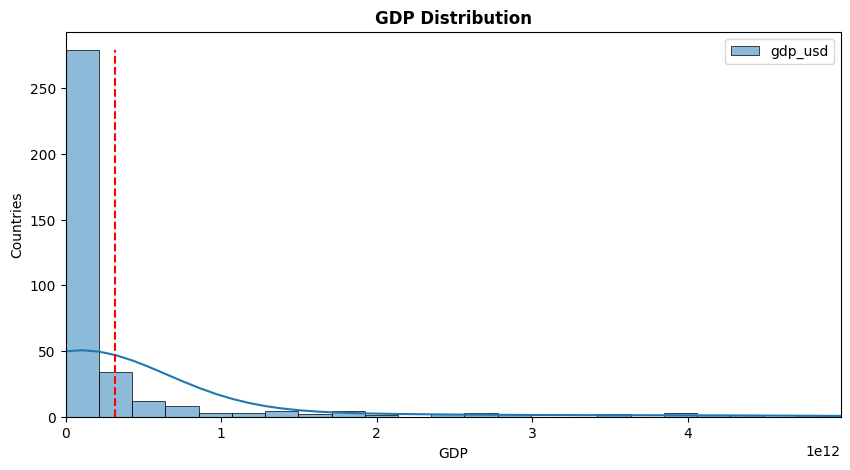

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))
# para colocar a legenda, colocar no label
# kde é a distro de probabilidade, seaborn gera hist + kde
# para usar vlines, é necessário usar o artist layer
# precisa atribuir à uma variável para pegas or patches, como get_height

graph = sns.histplot(data=df, x='gdp_usd', bins=100, label = 'gdp_usd', kde=True)
plt.xlim(0,df["gdp_usd"].quantile(0.98))
plt.title('GDP Distribution', weight = 'bold')
plt.xlabel('GDP')
plt.ylabel('Countries')
# posicao, de onde vai ser desenhada, até onde, cor, e linestyle
ax.vlines(df['gdp_usd'].quantile(0.8),0,graph.patches[0].get_height(), linestyles='dashed', colors='r')
plt.legend()
plt.show()

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()


plt.annotate('80% dos países, GDP $\leq$ ' + str(np.round(df['gdp_usd'].quantile(0.8)/1000000,2)) + 'MM',
             xy=(df['gdp_usd'].quantile(0.8), graph.patches[0].get_height()/2), # ponto do gráfico
             xytext=((xmax - xmin)/6,2/3*(ymax - ymin)),# posição do texto
             arrowprops=dict(arrowstyle="->"),
             weight='bold')




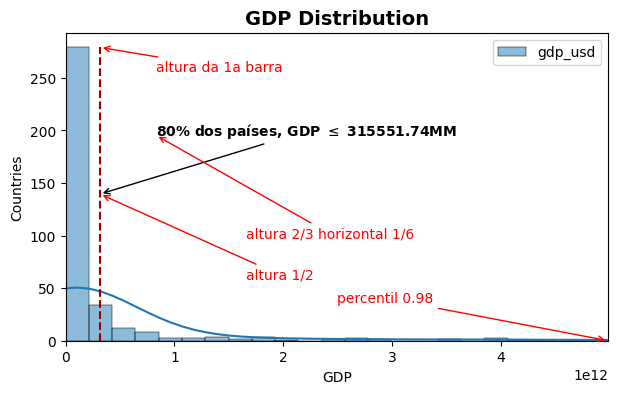